# Linear Reg using Tensorflow

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns
import numpy as np

### Generate Data

In [36]:
n_samples = 15
x = np.arange(n_samples)
y = 4*x+ 10*np.random.rand(n_samples)

In [37]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [38]:
y

array([ 9.40934177, 11.7068804 , 10.69080997, 16.32380273, 22.26198939,
       29.81615068, 33.57377647, 37.6668428 , 33.40802149, 42.35960203,
       46.72352747, 46.23501415, 52.56114448, 57.05932707, 59.34417728])

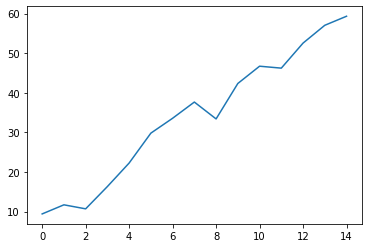

In [39]:
plt.plot(x,y)
plt.show()

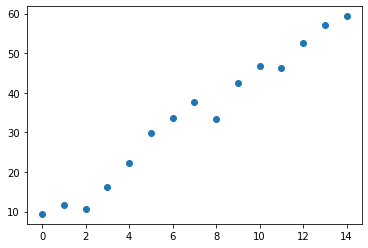

In [40]:
plt.scatter(x,y)
plt.show()

# Build the model

In [41]:
w = tf.Variable(np.random.rand(), name='weight')
b = tf.Variable(np.random.rand(), name='bias')

In [42]:
print(w.numpy())

0.7265115


In [43]:
print(b.numpy())

0.5652178


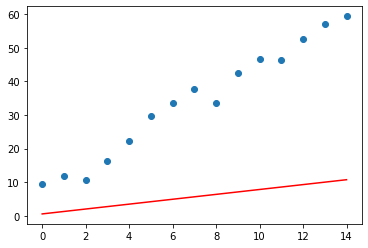

In [44]:
plt.scatter(x,y)
plt.plot(x, np.array(w*x+b), label='best fit line', color='r')
plt.show()

### This can be fixed this by changing weight and bias and we can perform backpropagation for that

# Define ANN terms

In [45]:
def linear_regression(x):
    return w * x + b

In [46]:
# def mean_square(predicted, actual):
#     total_error = 0
#     for i in range(len(actual)):
#         error = predicted[i] - actual[i]
#         sqrd_err = error**2
#         total_error += sqrd_error
#     mse = total_error/len(actual)
#     return mse

def mean_square(predicted, actual):
    assert len(predicted) == len(actual), "the predicted and actual vector shapes much match"
    return sum([(predicted[i] - actual[i])**2 for i in range(len(actual))])/len(actual)

## now we need an optimizer to reduce the cost function to a minimal cost by adjusting weights and bias

## We are gonna use SGD(stochaistic Gradient Descent) with learning rate of 0.01

In [47]:
optimizer = tf.optimizers.SGD(0.01)

# now we can build a train function

In [48]:
def train(X, y):
    # to perform automatic differentiation we use GradientTape
    with tf.GradientTape() as gt:
        y_predict = linear_regression(X)
        loss = mean_square(y_predict, y)
        
    #calculate gradient
    gradient = gt.gradient(loss, [w, b])
    # update the weight and bias
    optimizer.apply_gradients(zip(gradient, [w, b]))
    

# Training the model

In [49]:
epochs = 10

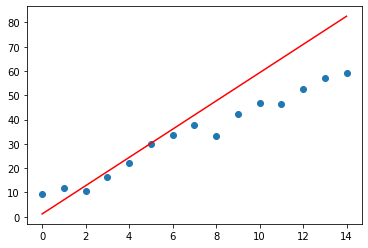

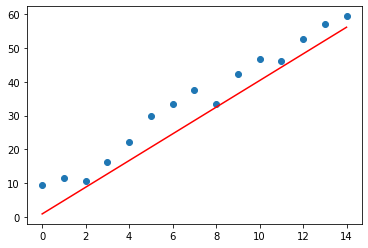

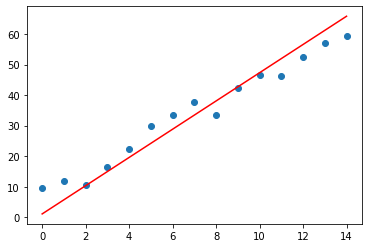

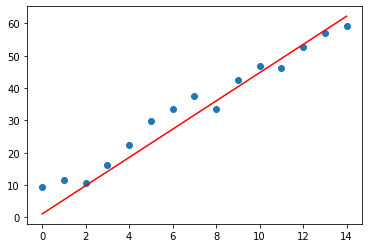

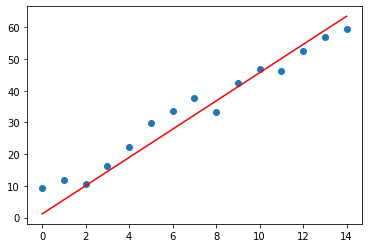

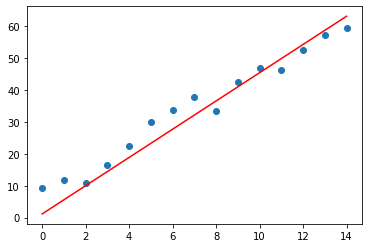

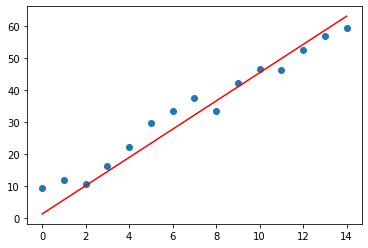

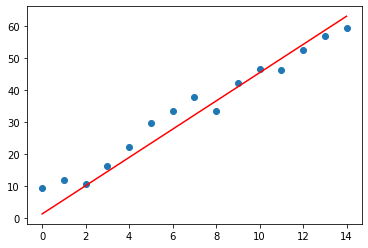

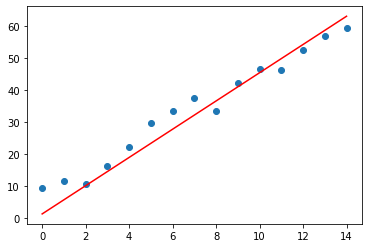

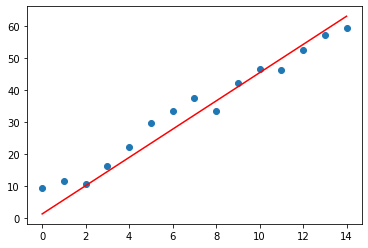

In [50]:
for epoch in range(epochs):
    train(x, y)
    plt.scatter(x,y)
    plt.plot(w*x+b, color='r')
    plt.show()

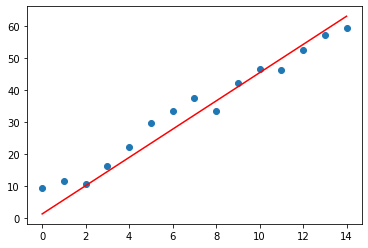

In [51]:
plt.scatter(x,y)
plt.plot(w*x+b, color='r')
plt.show()